In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import scipy.stats

%matplotlib inline
sns.set(palette="GnBu_d")

In [2]:
df_raw = pd.read_csv('avocado.csv')

In [3]:
df = df_raw.copy()

In [4]:
df.rename(columns={'4046': 'Hass small', '4225': 'Hass large', '4770': 'Hass Extra Large'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0          18249 non-null int64
Date                18249 non-null object
AveragePrice        18249 non-null float64
Total Volume        18249 non-null float64
Hass small          18249 non-null float64
Hass large          18249 non-null float64
Hass Extra Large    18249 non-null float64
Total Bags          18249 non-null float64
Small Bags          18249 non-null float64
Large Bags          18249 non-null float64
XLarge Bags         18249 non-null float64
type                18249 non-null object
year                18249 non-null int64
region              18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Date,AveragePrice,Total Volume,Hass small,Hass large,Hass Extra Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Chapter 2 - Distributions

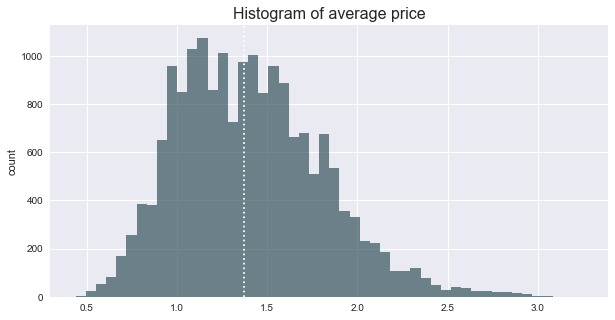

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(df['AveragePrice'], bins=50, alpha=0.7)
ax.set_ylabel('count')
plt.axvline(np.median(df['AveragePrice']), color='white', linestyle=':')
plt.title('Histogram of average price', fontsize=16);

In [10]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

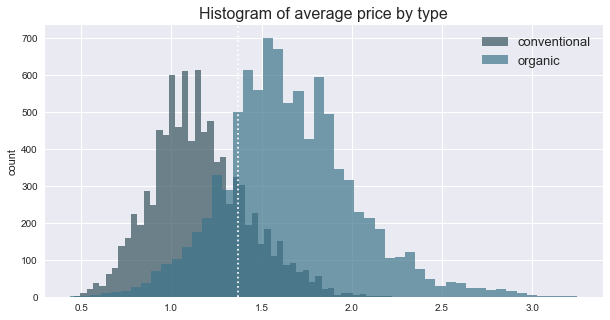

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(df[df['type'] == 'conventional']['AveragePrice'], bins=50, alpha=0.7, label='conventional')
plt.hist(df[df['type'] == 'organic']['AveragePrice'], bins=50, alpha=0.7, label='organic')
ax.set_ylabel('count')
plt.axvline(np.median(df['AveragePrice']), color='white', linestyle=':')
plt.title('Histogram of average price by type', fontsize=16)
plt.legend(fontsize=13);

In [12]:
# Let's calculate effect size
print('Conventional avocado mean price: ', df[df['type'] == 'conventional']['AveragePrice'].mean())
print('Organic avocado mean price: ', df[df['type'] == 'organic']['AveragePrice'].mean())

print('')
print('Standard deviation of price for both types of avocado: ', df['AveragePrice'].std())
print('')

print('Effect size as Cohen\'s d: ')
print((np.sqrt(
    (np.power(df[df['type'] == 'conventional']['AveragePrice'].std(), 2) +\
    np.power(df[df['type'] == 'organic']['AveragePrice'].std(), 2)) / 2 
    )) /\
      df['AveragePrice'].std())

Conventional avocado mean price:  1.1580396668858206
Organic avocado mean price:  1.6539986846432082

Standard deviation of price for both types of avocado:  0.40267655549555004

Effect size as Cohen's d: 
0.787909256913172


This means the difference in price between types is 0.8 standard deviations, and it is considered quite strong, a difference that should be visible with a naked eye. We can confirm this by looking at histograms.

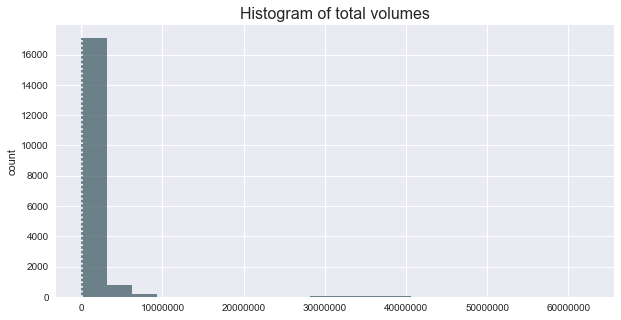

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(df['Total Volume'], bins=20, alpha=0.7)
ax.set_ylabel('count')
plt.axvline(np.median(df['Total Volume']), color='white', linestyle=':')
plt.ticklabel_format(style='plain')
plt.title('Histogram of total volumes', fontsize=16);

In [14]:
print('Average price mean: ', df['AveragePrice'].mean())
print('Average price variance: ', df['AveragePrice'].var())
print('Average price standard deviation: ', df['AveragePrice'].std())

Average price mean:  1.4059784097758825
Average price variance:  0.16214840834576077
Average price standard deviation:  0.40267655549555004


In [15]:
print('Total Volume mean: ', df['Total Volume'].mean())
print('Total Volume variance: ', df['Total Volume'].var())
print('Total Volume standard deviation: ', df['Total Volume'].std())

Total Volume mean:  850644.0130089332
Total Volume variance:  11926975521801.33
Total Volume standard deviation:  3453545.3553994815


In [16]:
df['Total Volume'].nlargest(20)

9097    62505646.52
8366    61034457.10
5506    52288697.89
8353    47293921.60
5493    46324529.70
2699    44655461.51
9090    43409835.75
9096    43167806.09
9099    42939821.55
5494    42867608.54
8368    42140393.39
9091    41386314.12
2686    41291704.39
8365    41077470.65
9093    40741214.05
9092    40449603.12
5489    40231259.65
9098    40171640.84
9094    40021528.76
5490    40019075.24
Name: Total Volume, dtype: float64

In [17]:
df['Total Volume'].nsmallest(20)

10381     84.56
9437     379.82
13189    385.55
11698    419.98
13193    472.82
11697    482.26
16201    515.01
9426     530.96
13190    542.85
11719    561.10
12133    562.64
12201    563.06
12132    566.57
10396    571.40
11693    588.87
11725    593.39
9410     614.30
11723    627.80
16207    634.09
11687    657.42
Name: Total Volume, dtype: float64

Total Volume values are very broadly distributed and the above histogram is not very informative. We see that there are huge discrepancies, but we have no idea where they come from. Would it make sense to group them by day?

In [18]:
len(df.Date.unique())

169

It looks like it would, we have over 18k data points but only 169 days, without knowledge on how it is grouped, we get a histogram that doesn't tell us anything.

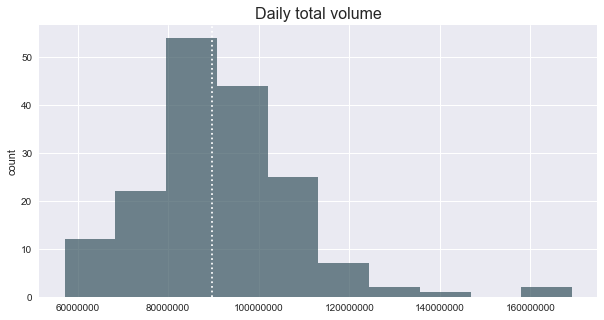

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(df.groupby('Date').sum()['Total Volume'], alpha=0.7)
plt.ticklabel_format(axis='x', style='plain')
ax.set_ylabel('count')
plt.axvline(np.median(df.groupby('Date').sum()['Total Volume']), color='white', linestyle=':')
plt.ticklabel_format(style='plain')
plt.title('Daily total volume', fontsize=16);

Now this is something we can interpret. Usually we get around 9 mln avocados daily for all types and origins. Right tail is longer, which tells us that there happen some extraordinary days with an overflow of avocados. But when looking at frequency, it's obvious that most days will bring between 7 to 11 mln of items.

## Chapter 3 - Probability Mass Functions

*Another way to represent a distribution is a probability mass function (PMF), which maps from each value to its probability. A probability is a frequency expressed as a fraction of the sample size, n. To get from frequencies to probabilities, we divide through by n, which is called normalization.*

*The biggest difference is that a histogram maps from values to integer counters; a PMF maps from values to floating-point probabilities.*

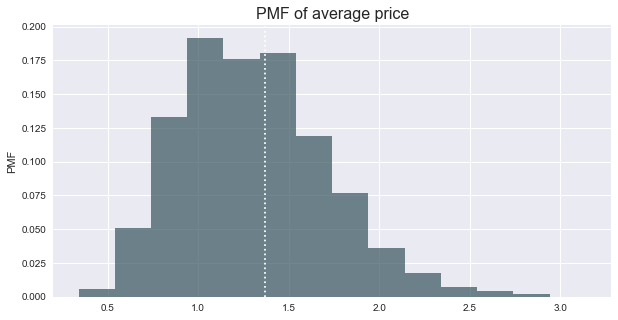

In [20]:
bins = np.arange(df['AveragePrice'].min(), df['AveragePrice'].max(), 0.2)
values, base = np.histogram(df['AveragePrice'], bins=bins, density=True)
values_unified = values / values.sum()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(bins[:-1], values_unified, alpha=0.7, width=0.2)
ax.set_ylabel('PMF')
plt.axvline(np.median(df['AveragePrice']), color='white', linestyle=':')
plt.title('PMF of average price', fontsize=16);

In [21]:
# probabilities need to sum to 1
values_unified.sum()

1.0

In [22]:
# function to get a probability of a single data point
def pmf(data, x):
    count = sum(data == x)
    total_count = count / len(data)
    return total_count    

In [23]:
pmf(df['AveragePrice'], 1.08)

0.010630719491478985

Doesn't seem right from first look at the above histogram, but note that data there is binned. However probability of taking exactly 1.08 from all prices is much lower. This can be represented on a histogram that plots each data point individually.

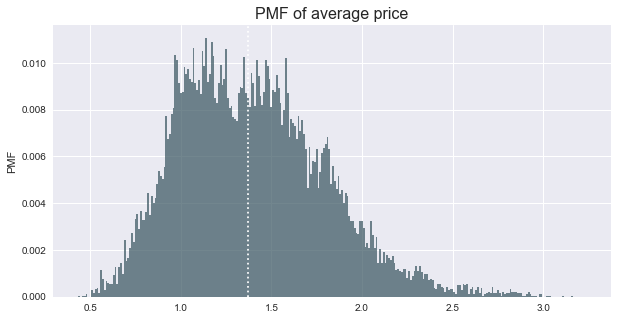

In [24]:
bins = np.arange(df['AveragePrice'].min(), df['AveragePrice'].max(), 0.01)
values, base = np.histogram(df['AveragePrice'], bins=bins, density=True)
values_unified = values / values.sum()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(bins[:-1], values_unified, alpha=0.7, width=0.01)
ax.set_ylabel('PMF')
plt.axvline(np.median(df['AveragePrice']), color='white', linestyle=':')
plt.title('PMF of average price', fontsize=16);

In [25]:
len(df[df['AveragePrice'] == 1.08])

194

Having each value mapped to their probability, we can also calculate mean of the data series...

In [26]:
results = []
for x in df['AveragePrice'].unique():
    r = pmf(df['AveragePrice'], x)
    results.append(r)

In [27]:
multiply = np.multiply(df['AveragePrice'].unique(), results)

In [28]:
multiply.sum()

1.405978409775878

...and compare it to mean calculated in a standard way.

In [29]:
df['AveragePrice'].mean()

1.4059784097758825

## Chapter 4 - Cumulative Distribution Functions

*PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases.*

Just as in the PMF for Average Price, where each bin corresponds to one value.

*The CDF is the function that maps from a value to its percentile rank.
The CDF is a function of x, where x is any value that might appear in the distribution. To evaluate CDF(x) for a particular value of x, we compute the fraction of values in the distribution less than or equal to x.*

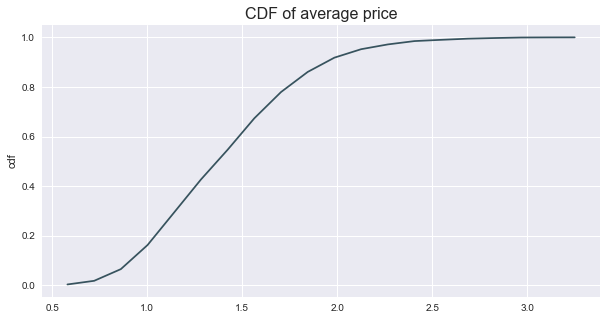

In [30]:
num_bins = 20
counts, bin_edges = np.histogram(df['AveragePrice'], bins=num_bins, density=True)
cdf = np.cumsum(counts)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(bin_edges[1:], cdf/cdf[-1])
ax.set_ylabel('cdf')
plt.title('CDF of average price', fontsize=16);

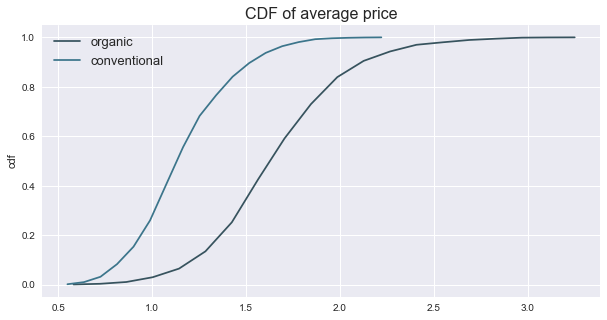

In [31]:
num_bins = 20
counts, bin_edges = np.histogram(df[df['type'] == 'organic']['AveragePrice'], bins=num_bins, normed=True)
cdf = np.cumsum(counts)

counts2, bin_edges2 = np.histogram(df[df['type'] == 'conventional']['AveragePrice'], bins=num_bins, normed=True)
cdf2= np.cumsum(counts2)

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(bin_edges[1:], cdf/cdf[-1], label='organic')
plt.plot(bin_edges2[1:], cdf2/cdf2[-1], label='conventional')
ax.set_ylabel('cdf')
plt.title('CDF of average price', fontsize=16)
plt.legend(fontsize=13);

What does this plot tell?

* Both lines are not very steep, this means that there isn't a lot of equal values.
* 50% of conventional avocados cost less than 1.2 USD, 50% of organic avocados cost less than 1.7 USD.
* Organic avocados have larger group of avocados that are more expensive than 90% of avocados of the same type.

Let's calculate percentiles

• Percentile rank - Given a value x, computes its percentile rank, 100 * CDF(x).

• Percentile - Given a percentile rank p, computes the corresponding value, x. Equivalent to Value(p/100).

In [32]:
def percentile_rank(data, x):
    count = 0
    for val in data:
        if val <= x:
            count += 1
    percentile_rank = 100 * count / len(data)
    return percentile_rank

In [33]:
percentile_rank(df['AveragePrice'], 1.08)

23.80952380952381

In [34]:
df['AveragePrice'].median()

1.37

In [35]:
percentile_rank(df['AveragePrice'], 1.37)

50.32604526275412

In [36]:
def percentile(data, rank):
    data = sorted(data)
    for val in data:
        if percentile_rank(data, val) >= rank:
            return val

In [37]:
percentile(df['AveragePrice'], 50)

1.37

Let's calculate Interquartile Range (IQR) and print 10-quantiles.

*Quantile: A sequence of values that correspond to equally spaced per- centile ranks*

In [40]:
# IQR
percentile(df['AveragePrice'], 75) - percentile(df['AveragePrice'], 25)

0.5599999999999998

In [41]:
# quantiles
for i in np.arange(0, 100, 10):
    print(str(i) + '-quantile: ' + str(percentile(df['AveragePrice'], i)))

0-quantile: 0.44
10-quantile: 0.93
20-quantile: 1.05
30-quantile: 1.15
40-quantile: 1.26
50-quantile: 1.37
60-quantile: 1.48
70-quantile: 1.6
80-quantile: 1.74
90-quantile: 1.93


Plotting a CDF of percentile ranks.

In [42]:
random_vals = sorted(np.random.choice(df['AveragePrice'], size=100, replace=True))

In [43]:
random_vals_rank = []
for val in random_vals:
    r = percentile_rank(df['AveragePrice'], val)
    random_vals_rank.append(r)

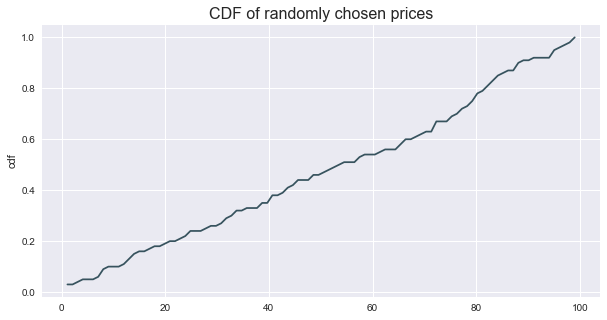

In [44]:
num_bins = 100
counts, bin_edges = np.histogram(random_vals_rank, bins=num_bins, density=True)
cdf = np.cumsum(counts)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(bin_edges[1:], cdf/cdf[-1])
ax.set_ylabel('cdf')
plt.title('CDF of randomly chosen prices', fontsize=16);

## Chapter 5 - Modeling Distributions

*The distributions we have used so far are called empirical distributions because they are based on empirical observations, which are necessarily finite samples.
The alternative is an analytic distribution, which is characterized by a CDF that is a mathematical function. Analytic distributions can be used to model empirical distributions. In this context, a model is a simplification that leaves out unneeded details. *

#### Exponential distribution

*In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.*

*Complementary CDF (CCDF) is 1 − CDF(x) on a log-y scale. For data from an exponential distribution, the result is a straight line.*

In [278]:
lmbda = 0.5
x = np.arange(0, 10)
cdf = 1 -  np.exp(-lmbda * x)

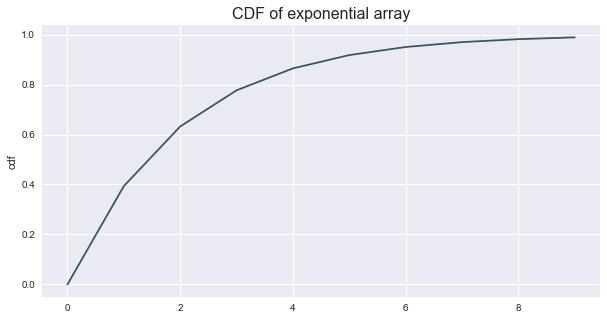

In [279]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylabel('cdf')
plt.title('CDF of exponential array', fontsize=16)
plt.plot(x,cdf);

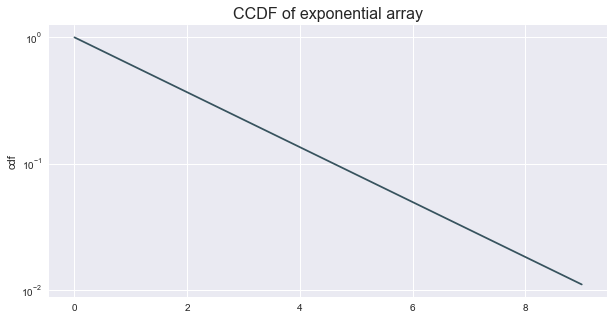

In [254]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylabel('cdf')
plt.title('CCDF of exponential array', fontsize=16)
plt.plot(x,1 - cdf)
plt.yscale('log');

Lambda is a rate - number of events that occur in the unit of time.

In [255]:
mean = 1/lmbda
mean

2.0

This is the mean time between ocurrences.

In [272]:
# second attempt, genereted with numpy.random and scale argument
x2 = np.sort(np.random.exponential(scale=2, size=1000))
cdf = 1 - np.exp(-0.5 * x2)

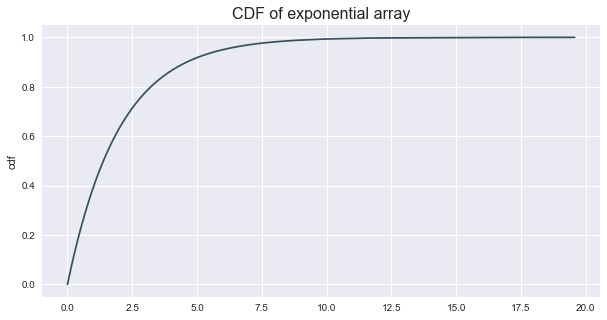

In [273]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylabel('cdf')
plt.title('CDF of exponential array', fontsize=16)
plt.plot(x2, cdf);

#### Normal distribution

*The normal distribution is characterized by two parameters: the mean, μ, and standard deviation σ. The normal distribution with μ = 0 and σ = 1 is called the standard normal distribution.*

In [283]:
x = np.random.normal(size=1000)
x[:10]

array([-1.49664044, -0.04385206,  0.33981051,  1.72567628, -1.67518917,
        2.00290257, -0.16021456,  1.25788159, -1.54470139,  0.89977754])

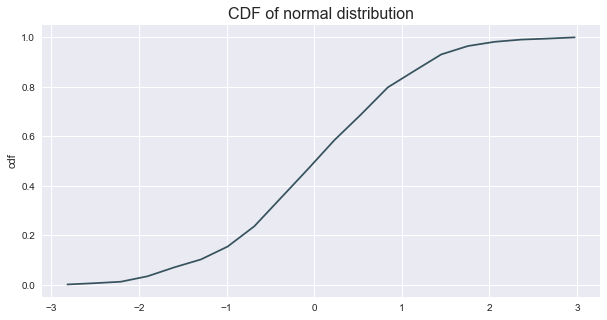

In [284]:
counts, bin_edges = np.histogram(x, bins=20, density=False)
cdf = np.cumsum(counts)
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(bin_edges[1:], cdf/cdf[-1])
ax.set_ylabel('cdf')
plt.title('CDF of normal distribution', fontsize=16);

In [286]:
# evaluates standard normal distribution
scipy.stats.norm.cdf(0)

0.5

In [289]:
# loc overwrites mean, scale overwrites standard deviation
scipy.stats.norm.cdf(1, loc=1, scale=1)

0.5

#### Normal probability plot

*For normal distribution there is no transformation, that can test whether analytical model is a good approximation of the dataset (as e.g. CCDF is for exponential distribution). The alternative is normal probability plot*